In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import catboost
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, classification_report

In [2]:
hd = pd.read_csv("project heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
np.random.seed(120)
x = hd.drop("target", axis=1)
y = hd["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9016393442622951

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), LogisticRegression())

model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9016393442622951

In [5]:
mparam_grid = {'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
               'logisticregression__C' : np.logspace(-4, 4, 20),
               'logisticregression__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
               'logisticregression__max_iter' : [100, 1000,2500, 5000]
               }
              
cparam_grid = {
                'bootstrap': [True, False],
               'max_depth': [90, 100, None],
               'max_features': [2, 3],
               'min_samples_leaf': [3, 4, 5],
               'min_samples_split': np.arange(2, 20, 2),
               'n_estimators': [100, 200, 300, 1000]
              }

In [6]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [24]:
gsv = GridSearchCV(estimator=model, param_grid=mparam_grid, n_jobs=-1, cv=5, verbose=2)

In [25]:
gsv.fit(x_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\ishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.pena

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logisticregression__max_iter': [100, 1000, 2500,
                                                          5000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['

In [26]:
gsv.score(x_test, y_test)

0.8852459016393442

In [27]:
rsv = GridSearchCV(estimator=clf, param_grid=cparam_grid, n_jobs=-1, cv=5, verbose=2)

In [28]:
rsv.fit(x_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [90, 100, None], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [49]:
y_preds = clf.predict(x_test)

In [50]:
accuracy_score(y_test, y_preds)

0.9016393442622951

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


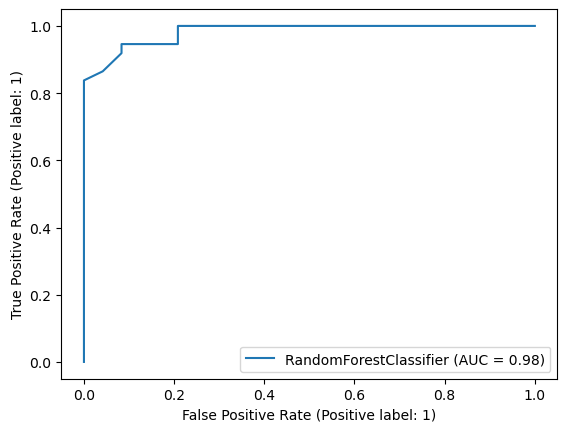

In [48]:
plot_roc_curve(clf, x_test, y_preds)

In [52]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 2, 32]], dtype=int64)

<AxesSubplot:>

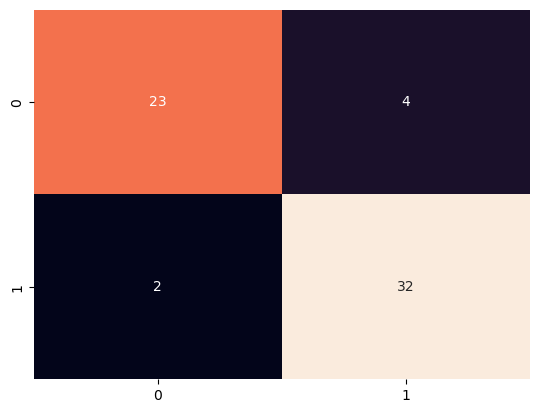

In [51]:
sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True,
            cbar=False)

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [85]:
np.random.seed(42)
z = cross_val_score(model, x, y, cv=5, scoring='accuracy')

In [86]:
np.mean(z)

0.8348633879781422

In [87]:
gsv.best_params_

{'logisticregression__C': 0.0001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'lbfgs'}

In [92]:
cl = LogisticRegression(C= 0.0001,
                        max_iter = 100,
                        penalty = 'none',
                        solver='lbfgs')

In [93]:
cl.fit(x_train, y_train)

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, penalty='none')

In [94]:
cl.coef_

array([[ 1.10013940e-02, -1.38035189e+00,  8.05526443e-01,
        -1.59365445e-02, -9.01915427e-04, -1.02880355e-01,
         5.71915430e-01,  2.37074207e-02, -7.20622536e-01,
        -5.27111562e-01,  7.95028232e-01, -7.30582600e-01,
        -7.59441645e-01]])

In [95]:
cl_dict = dict(zip(hd.columns, list(cl.coef_[0])))

In [96]:
cl_dict

{'age': 0.01100139401721065,
 'sex': -1.380351892375149,
 'cp': 0.8055264427036556,
 'trestbps': -0.015936544539244684,
 'chol': -0.0009019154272508355,
 'fbs': -0.10288035489080813,
 'restecg': 0.5719154297766725,
 'thalach': 0.023707420709951438,
 'exang': -0.7206225359022895,
 'oldpeak': -0.5271115619866297,
 'slope': 0.7950282324624746,
 'ca': -0.7305825999614025,
 'thal': -0.7594416450680603}

In [99]:
feature = pd.DataFrame(cl_dict, index=[0] )

<AxesSubplot:>

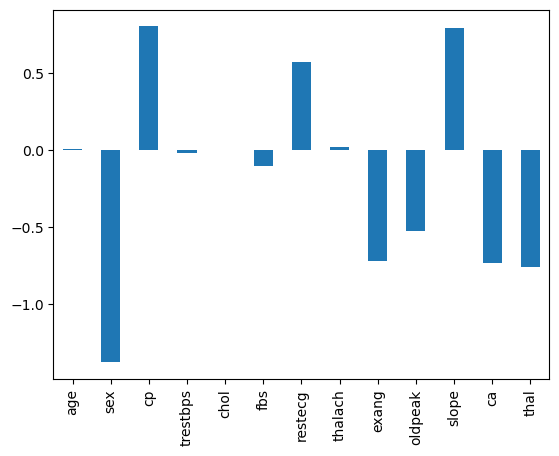

In [110]:
feature.T.plot.bar(legend=False)

In [112]:
conda install -c conda-forge py-xgboost

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ishan\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    py-xgboost-1.7.3           |   py39haa95532_0         197 KB
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         pkgs/main/win-64::libxgboost-1.7.3-hd77b12b_0 
  py-xgboost         pkgs/main/win-64::py-xgboost-1.7.3-py39haa95532_0 




libxgboost-1.7.3     | 1.5 MB    |            |   0% 

py-xgbo

In [3]:
from xgboost import XGBClassifier

In [10]:
new_clf_1 = XGBClassifier()

In [11]:
new_clf_1.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
new_clf_1.score(x_test, y_test)


0.8032786885245902

In [14]:
pip install catboost

     ---------------------------------------- 74.0/74.0 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
cb = catboost.CatBoostClassifier(random_seed=120)

In [53]:
cb.fit(x_train, y_train)
cb.score(x_test, y_test)

Learning rate set to 0.005621
0:	learn: 0.6896219	total: 4.19ms	remaining: 4.18s
1:	learn: 0.6849157	total: 8.4ms	remaining: 4.19s
2:	learn: 0.6804873	total: 12.9ms	remaining: 4.28s
3:	learn: 0.6766848	total: 16.7ms	remaining: 4.16s
4:	learn: 0.6722473	total: 21.2ms	remaining: 4.22s
5:	learn: 0.6686941	total: 24.3ms	remaining: 4.02s
6:	learn: 0.6646754	total: 29.2ms	remaining: 4.14s
7:	learn: 0.6597999	total: 33.6ms	remaining: 4.16s
8:	learn: 0.6563933	total: 37.1ms	remaining: 4.08s
9:	learn: 0.6540038	total: 39.4ms	remaining: 3.9s
10:	learn: 0.6516830	total: 42.6ms	remaining: 3.83s
11:	learn: 0.6482444	total: 46.1ms	remaining: 3.8s
12:	learn: 0.6438104	total: 50.3ms	remaining: 3.82s
13:	learn: 0.6400953	total: 54.3ms	remaining: 3.83s
14:	learn: 0.6366017	total: 57.7ms	remaining: 3.79s
15:	learn: 0.6328017	total: 61.5ms	remaining: 3.78s
16:	learn: 0.6290277	total: 65.8ms	remaining: 3.81s
17:	learn: 0.6257165	total: 70.1ms	remaining: 3.82s
18:	learn: 0.6225735	total: 74.1ms	remaining: 3

195:	learn: 0.3171854	total: 799ms	remaining: 3.28s
196:	learn: 0.3164527	total: 803ms	remaining: 3.27s
197:	learn: 0.3157205	total: 807ms	remaining: 3.27s
198:	learn: 0.3152148	total: 809ms	remaining: 3.26s
199:	learn: 0.3146462	total: 812ms	remaining: 3.25s
200:	learn: 0.3139837	total: 815ms	remaining: 3.24s
201:	learn: 0.3131939	total: 817ms	remaining: 3.23s
202:	learn: 0.3124297	total: 821ms	remaining: 3.22s
203:	learn: 0.3114741	total: 825ms	remaining: 3.22s
204:	learn: 0.3107797	total: 829ms	remaining: 3.21s
205:	learn: 0.3103399	total: 832ms	remaining: 3.21s
206:	learn: 0.3096626	total: 836ms	remaining: 3.2s
207:	learn: 0.3090763	total: 840ms	remaining: 3.2s
208:	learn: 0.3081831	total: 844ms	remaining: 3.19s
209:	learn: 0.3075491	total: 848ms	remaining: 3.19s
210:	learn: 0.3066430	total: 852ms	remaining: 3.19s
211:	learn: 0.3060946	total: 856ms	remaining: 3.18s
212:	learn: 0.3054626	total: 860ms	remaining: 3.18s
213:	learn: 0.3046494	total: 864ms	remaining: 3.17s
214:	learn: 0.

386:	learn: 0.2232378	total: 1.55s	remaining: 2.46s
387:	learn: 0.2229641	total: 1.56s	remaining: 2.46s
388:	learn: 0.2227527	total: 1.56s	remaining: 2.45s
389:	learn: 0.2226590	total: 1.56s	remaining: 2.45s
390:	learn: 0.2222589	total: 1.57s	remaining: 2.44s
391:	learn: 0.2220014	total: 1.57s	remaining: 2.44s
392:	learn: 0.2215924	total: 1.58s	remaining: 2.44s
393:	learn: 0.2210236	total: 1.58s	remaining: 2.43s
394:	learn: 0.2209842	total: 1.58s	remaining: 2.42s
395:	learn: 0.2208663	total: 1.59s	remaining: 2.42s
396:	learn: 0.2204163	total: 1.59s	remaining: 2.42s
397:	learn: 0.2200935	total: 1.59s	remaining: 2.41s
398:	learn: 0.2198274	total: 1.6s	remaining: 2.41s
399:	learn: 0.2195538	total: 1.6s	remaining: 2.4s
400:	learn: 0.2192021	total: 1.61s	remaining: 2.4s
401:	learn: 0.2187453	total: 1.61s	remaining: 2.4s
402:	learn: 0.2186084	total: 1.61s	remaining: 2.39s
403:	learn: 0.2182505	total: 1.62s	remaining: 2.39s
404:	learn: 0.2177261	total: 1.62s	remaining: 2.38s
405:	learn: 0.217

545:	learn: 0.1793057	total: 2.13s	remaining: 1.77s
546:	learn: 0.1789765	total: 2.14s	remaining: 1.77s
547:	learn: 0.1787280	total: 2.14s	remaining: 1.77s
548:	learn: 0.1785848	total: 2.15s	remaining: 1.76s
549:	learn: 0.1783149	total: 2.15s	remaining: 1.76s
550:	learn: 0.1782074	total: 2.15s	remaining: 1.75s
551:	learn: 0.1780100	total: 2.16s	remaining: 1.75s
552:	learn: 0.1778125	total: 2.16s	remaining: 1.75s
553:	learn: 0.1775858	total: 2.16s	remaining: 1.74s
554:	learn: 0.1774356	total: 2.17s	remaining: 1.74s
555:	learn: 0.1773894	total: 2.17s	remaining: 1.73s
556:	learn: 0.1771163	total: 2.17s	remaining: 1.73s
557:	learn: 0.1769186	total: 2.18s	remaining: 1.73s
558:	learn: 0.1767400	total: 2.18s	remaining: 1.72s
559:	learn: 0.1764868	total: 2.19s	remaining: 1.72s
560:	learn: 0.1762463	total: 2.19s	remaining: 1.71s
561:	learn: 0.1761570	total: 2.19s	remaining: 1.71s
562:	learn: 0.1759856	total: 2.2s	remaining: 1.71s
563:	learn: 0.1758084	total: 2.2s	remaining: 1.7s
564:	learn: 0.1

739:	learn: 0.1442607	total: 2.91s	remaining: 1.02s
740:	learn: 0.1441336	total: 2.91s	remaining: 1.02s
741:	learn: 0.1438128	total: 2.92s	remaining: 1.01s
742:	learn: 0.1437129	total: 2.92s	remaining: 1.01s
743:	learn: 0.1435064	total: 2.92s	remaining: 1.01s
744:	learn: 0.1433266	total: 2.93s	remaining: 1s
745:	learn: 0.1431661	total: 2.93s	remaining: 998ms
746:	learn: 0.1430036	total: 2.93s	remaining: 994ms
747:	learn: 0.1428568	total: 2.94s	remaining: 990ms
748:	learn: 0.1427043	total: 2.94s	remaining: 986ms
749:	learn: 0.1425597	total: 2.94s	remaining: 982ms
750:	learn: 0.1424715	total: 2.95s	remaining: 978ms
751:	learn: 0.1421703	total: 2.95s	remaining: 974ms
752:	learn: 0.1419568	total: 2.96s	remaining: 970ms
753:	learn: 0.1417891	total: 2.96s	remaining: 966ms
754:	learn: 0.1416514	total: 2.96s	remaining: 962ms
755:	learn: 0.1414691	total: 2.97s	remaining: 958ms
756:	learn: 0.1413242	total: 2.97s	remaining: 954ms
757:	learn: 0.1412147	total: 2.98s	remaining: 950ms
758:	learn: 0.1

936:	learn: 0.1165967	total: 3.71s	remaining: 250ms
937:	learn: 0.1164643	total: 3.72s	remaining: 246ms
938:	learn: 0.1163936	total: 3.72s	remaining: 242ms
939:	learn: 0.1163242	total: 3.73s	remaining: 238ms
940:	learn: 0.1161938	total: 3.73s	remaining: 234ms
941:	learn: 0.1160420	total: 3.73s	remaining: 230ms
942:	learn: 0.1159654	total: 3.74s	remaining: 226ms
943:	learn: 0.1159019	total: 3.74s	remaining: 222ms
944:	learn: 0.1157351	total: 3.74s	remaining: 218ms
945:	learn: 0.1156242	total: 3.75s	remaining: 214ms
946:	learn: 0.1155558	total: 3.75s	remaining: 210ms
947:	learn: 0.1153598	total: 3.75s	remaining: 206ms
948:	learn: 0.1152636	total: 3.76s	remaining: 202ms
949:	learn: 0.1151780	total: 3.76s	remaining: 198ms
950:	learn: 0.1151375	total: 3.77s	remaining: 194ms
951:	learn: 0.1150616	total: 3.77s	remaining: 190ms
952:	learn: 0.1148675	total: 3.77s	remaining: 186ms
953:	learn: 0.1147512	total: 3.77s	remaining: 182ms
954:	learn: 0.1146239	total: 3.78s	remaining: 178ms
955:	learn: 

0.9508196721311475

In [45]:
cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.00562100